# **Source**

https://ourworldindata.org/renewable-energy

# **Exploration/nettoyage des donnees**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px



from google.colab import files
data_to_load = files.upload()

Saving renewable-share-energy.csv to renewable-share-energy.csv


In [ ]:
import io
energy = pd.read_csv(io.BytesIO(data_to_load['renewable-share-energy.csv']))
energy.head()

,Entity,Code,Year,Renewables (% sub energy)
0,Africa,NaN,1965,5.537355
1,Africa,NaN,1966,5.872988
2,Africa,NaN,1967,6.080489
3,Africa,NaN,1968,6.742673
4,Africa,NaN,1969,7.682926


In [ ]:
energy = energy.drop('Code', axis = 1)

In [ ]:
energy = energy.rename(columns = {'Renewables (% sub energy)': 'Renewables'})
energy.head()

,Entity,Year,Renewables
0,Africa,1965,5.537355
1,Africa,1966,5.872988
2,Africa,1967,6.080489
3,Africa,1968,6.742673
4,Africa,1969,7.682926


In [ ]:
energy.dtypes

Entity         object
Year            int64
Renewables    float64
dtype: object

In [ ]:
energy.shape

(4284, 3)

In [ ]:
#part des energies renouvelables en Europe (1965-2019)
europe = energy['Entity'].isin(['Europe'])
energy_europe = energy.loc[europe]
energy_europe.head()

,Entity,Year,Renewables
1119,Europe,1965,6.860844
1120,Europe,1966,7.172621
1121,Europe,1967,6.973196
1122,Europe,1968,6.780332
1123,Europe,1969,6.231246


In [ ]:
#part des energies renouvelables en Afrique (1965-2019)
africa = energy['Entity'].isin(['Africa'])
energy_africa = energy.loc[africa]
energy_africa.head()

,Entity,Year,Renewables
0,Africa,1965,5.537355
1,Africa,1966,5.872988
2,Africa,1967,6.080489
3,Africa,1968,6.742673
4,Africa,1969,7.682926


In [ ]:
#part des energies renouvelables en Amerique du Nord (1965-2019)
N_america = energy['Entity'].isin(['North America'])
energy_N_america = energy.loc[N_america]
energy_N_america.head()

,Entity,Year,Renewables
2519,North America,1965,5.808369
2520,North America,1966,5.752399
2521,North America,1967,6.042059
2522,North America,1968,5.783903
2523,North America,1969,6.094484


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      4284 non-null   object 
 1   Year        4284 non-null   int64  
 2   Renewables  4284 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 100.5+ KB


# **Visualisation matplotlib**

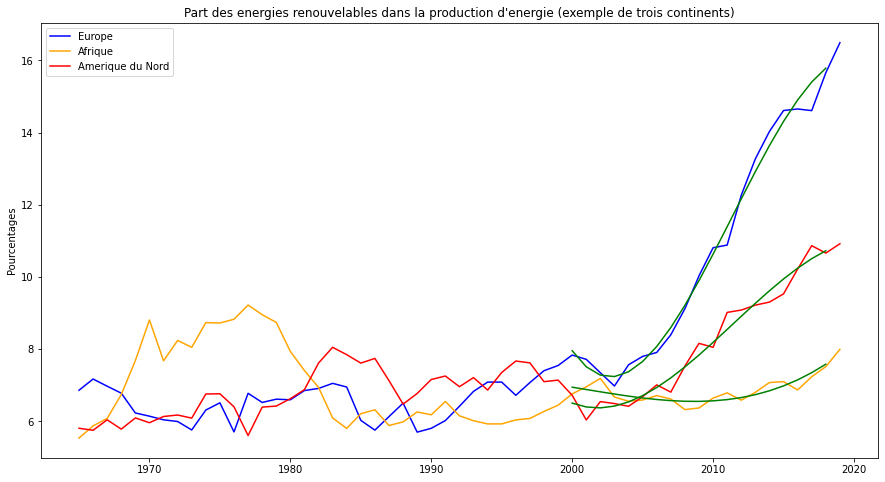

In [ ]:
#Creation du graphique pour les trois continents + regressions polynomiales depuis 2000
#si besoin : regression lineaire :  plt.plot(arr1,m*arr1+b,c="green")

x = energy_europe.iloc[:,1]
y_1 = energy_europe.iloc[:,2]
y_2 = energy_africa.iloc[:,2]
y_3 = energy_N_america.iloc[:,2]

fig, ax = plt.subplots(figsize = (15,8))

plt.plot(x,y_1, color='blue', label = 'Europe')
plt.plot(x,y_2, color='orange', label = 'Afrique')
plt.plot(x,y_3, color='red', label = 'Amerique du Nord')

plt.ylabel('Pourcentages')
plt.title("Part des energies renouvelables dans la production d'energie (exemple de trois continents)")
plt.legend()

#regressions polynomiales (degre 3)

#europe
condition_1 = energy_europe['Year']>=2000

arr1 = np.array(energy_europe[condition_1]['Year'])
arr2 = np.array(energy_europe[condition_1]['Renewables'])

polymodel_1 =np.polyfit(x = arr1,y = arr2, deg = 3)

Xmin_1 = arr1.min()
Xmax_1 =  arr1.max()
array = np.arange(Xmin_1, Xmax_1)

reg_1 = plt.plot(array,np.poly1d(polymodel_1)(array), c='green')


#afrique
condition_2 = energy_africa['Year']>=2000

arr3 = np.array(energy_africa[condition_2]['Year'])
arr4 = np.array(energy_africa[condition_2]['Renewables'])

polymodel_2 =np.polyfit(x = arr3,y = arr4, deg = 3)

Xmin_2 = arr3.min()
Xmax_2 =  arr3.max()
array_2 = np.arange(Xmin_2, Xmax_2)

reg_2 = plt.plot(array,np.poly1d(polymodel_2)(array_2), c='green')

#north america
condition_3 = energy_N_america['Year']>=2000

arr5 = np.array(energy_N_america[condition_3]['Year'])
arr6 = np.array(energy_N_america[condition_3]['Renewables'])

polymodel_3 =np.polyfit(x = arr5,y = arr6, deg = 3)

Xmin_3 = arr5.min()
Xmax_3 =  arr5.max()
array_3 = np.arange(Xmin_3, Xmax_3)

reg_3 = plt.plot(array,np.poly1d(polymodel_3)(array_3), c='green')



plt.show()

# **Visualisation Seaborn /plotly**

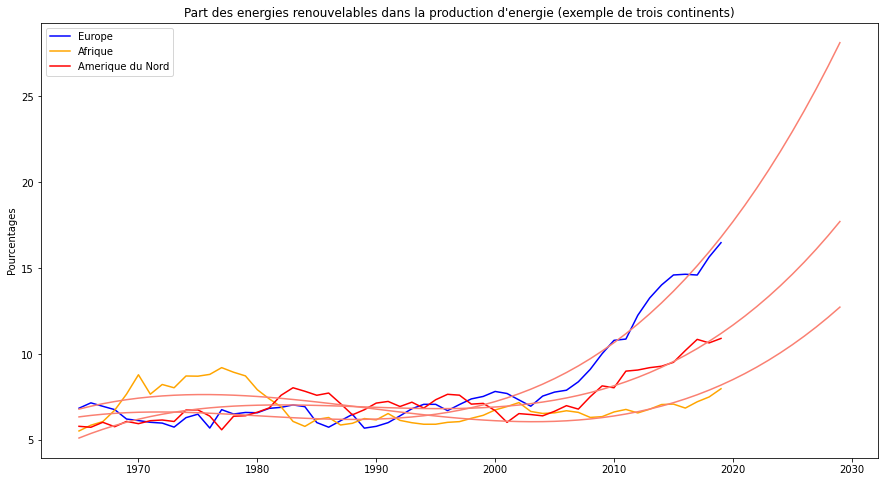

In [ ]:
#regressions avec predictions jusqu'en 2030


x = energy_europe.iloc[:,1]
y_1 = energy_europe.iloc[:,2]
y_2 = energy_africa.iloc[:,2]
y_3 = energy_N_america.iloc[:,2]

#sans predictions
fig, ax = plt.subplots(figsize = (15,8))

plt.plot(x,y_1, color='blue', label = 'Europe')
plt.plot(x,y_2, color='orange', label = 'Afrique')
plt.plot(x,y_3, color='red', label = 'Amerique du Nord')


plt.ylabel('Pourcentages')
plt.title("Part des energies renouvelables dans la production d'energie (exemple de trois continents)")
plt.legend()

#prediction europe
arr1 = np.array(energy_europe['Year'])
arr2 = np.array(energy_europe['Renewables'])

polymodel_1 =np.polyfit(x = arr1,y = arr2, deg = 3)

Xmin_1 = arr1.min()
Xmax_1 =  arr1.max()
array = np.arange(Xmin_1, Xmax_1)

sns.lineplot(x= np.arange(1965,2030),
             y= np.poly1d(polymodel_1)(np.arange(1965,2030)),
             color = 'salmon')


#prediction afrique
arr3 = np.array(energy_africa['Year'])
arr4 = np.array(energy_africa['Renewables'])

polymodel_2 =np.polyfit(x = arr3,y = arr4, deg = 3)

Xmin_2 = arr3.min()
Xmax_2 =  arr3.max()
array_2 = np.arange(Xmin_2, Xmax_2)

sns.lineplot(x= np.arange(1965,2030),
             y= np.poly1d(polymodel_2)(np.arange(1965,2030)),
             color = 'salmon')


#prediction amerique
arr5 = np.array(energy_N_america['Year'])
arr6 = np.array(energy_N_america['Renewables'])

polymodel_3 =np.polyfit(x = arr5,y = arr6, deg = 3)

Xmin_3 = arr5.min()
Xmax_3 =  arr5.max()
array_3 = np.arange(Xmin_3, Xmax_3)

sns.lineplot(x= np.arange(1965,2030),
             y= np.poly1d(polymodel_3)(np.arange(1965,2030)),
             color = 'salmon')
